In [239]:
pip install pandas konlpy

In [240]:
import pandas as pd
from konlpy.tag import Okt

df = pd.read_csv(".\df\etnew.csv")

#현재 중앙도서관 서포터즈 활동을 하면서 학생들이 필요로 하는 것이 무엇인지 궁금했다. 이를 과제와 연관하여 '중앙도서관'에 대해 작성한 글을 토픽모델링을 통해 알아보고
#토픽트렌드로 추세를 파악하려 했다. 
#따라서 교내 학생 어플인 '에브리타임'에서 '중앙도서관'이라는 키워드를 포함한 글을 크롤링하여 데이터를 수집하였다. 

In [241]:
df #아래는 그 데이터로, 글의 제목/내용/토픽트렌드를 위한 글의 작성 월을 크롤링하였다.

,title,content,time
0,🎸소리사냥 버스킹🎸,안녕하세요 소리사냥입니다 :)\n드디어… 축제가 다가왔습니다🍃\n저희 소리사냥이 내...,5.0
1,울고 싶어질 때도 미소 짓게 만드는 마법~,안녕하십니까 AI 컴퓨터공학부 소속 인공지능 동아리 SSF입니다!\n저희가 이번 봄...,5.0
2,썸남이 축제 때 같이 공연보자는데 이거 그린라이트임???,.\n.\n.\n.\n.\n미안하다... 이거 보여주려고 어그로 끌었다...\n그렇...,5.0
3,중앙도서관 시간,중앙도서관 몇시부터 몇시꺼지 해?,5.0
4,봄축제 때 시원한 칵테일 한 잔 빠라삐리뽀-?,안녕하세요! 경기대학교 경찰행정학과 봉사동아리\n🌱또바기🌱입니다 :)\n작년에 이어...,5.0
...,...,...,...
374,중앙도서관 책읽는곳 몇시까지해여?,평일이용,5.0
375,도서관 3층휴게실 음식물,중앙도서관 3층 휴게실에서 처먹지좀 말자....음료야 그렇다쳐도 냄새 풍기면서 햄버...,5.0
376,5월 9일이 중앙도서관 열람실 문 여나요..??,5월 9일 중앙도서관 열람실 문 여나요??,5.0
377,중앙도서관에서 책 어떻게 빌리나요?,중앙도서관 어디서 빌려요?,4.0


In [242]:
#여러차례 토픽모델링을 해본 결과 불필요한 단어나 어미 등이 포함되는 것을 확인하여 불용어사전을 만들어 불용어제거를 하였다.

In [243]:
stopwords = set(["번만", "혹시", "아시", "보신", "쪽지", "해도", "려고", "하나요","그냥", "마다", "진짜", "건가", "제발", "부터", "맞이", "이나", "하나", "경기대", "이것", "경기", "대학교", "도서관", "중앙", '인가요', '가요', '한가요', '저희', "보고", "인지", "이번", "가", "을", "를", "에", "의", "와", "과", "하고", "이다", "입니다"])

In [244]:
#내용 안의 불용어 사전 내 단어 제거 과정.

In [245]:
def remove_stopwords(text):
    okt = Okt()
    tokens = okt.morphs(str(text))
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered_tokens)

df['content'] = df['content'].apply(remove_stopwords)

In [246]:
#content 불용어 제거 완료 결과

In [247]:
df

,title,content,time
0,🎸소리사냥 버스킹🎸,안녕하세요 소 리사 냥 :) \n 드디어 … 축제 다가왔습니다 🍃 \n 소리 사냥 ...,5.0
1,울고 싶어질 때도 미소 짓게 만드는 마법~,안녕하십니까 AI 컴퓨터공학 부 소속 인공 지능 동아리 SSF ! \n 봄 축제 인...,5.0
2,썸남이 축제 때 같이 공연보자는데 이거 그린라이트임???,. \n . \n . \n . \n . \n 미안하다 ... 이 거 보여주려고 어그...,5.0
3,중앙도서관 시간,몇 시 몇 시 꺼 지 해 ?,5.0
4,봄축제 때 시원한 칵테일 한 잔 빠라삐리뽀-?,안녕하세요 ! 경찰 행정학 봉사 동아리 \n 🌱 또바기 🌱 :) \n 작년 이어 2...,5.0
...,...,...,...
374,중앙도서관 책읽는곳 몇시까지해여?,평일 이용,5.0
375,도서관 3층휴게실 음식물,3 층 휴게실 에서 처 먹지 좀 말 자 .... 음료 야 그렇 다쳐도 냄새 풍기면 ...,5.0
376,5월 9일이 중앙도서관 열람실 문 여나요..??,5월 9일 열람 실 문 여나요 ??,5.0
377,중앙도서관에서 책 어떻게 빌리나요?,어디서 빌려요 ?,4.0


In [248]:
#content와 같은 방식으로 title 불용어 제거. 

In [249]:
def remove_stopwords(text):
    okt = Okt()
    tokens = okt.morphs(str(text))
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered_tokens)

df['title'] = df['title'].apply(remove_stopwords)

In [250]:
df #title 불용어 제거 결과.

,title,content,time
0,🎸 소리 사냥 버스킹 🎸,안녕하세요 소 리사 냥 :) \n 드디어 … 축제 다가왔습니다 🍃 \n 소리 사냥 ...,5.0
1,울 고 싶어질 때 도 미소 짓게 만드는 마법 ~,안녕하십니까 AI 컴퓨터공학 부 소속 인공 지능 동아리 SSF ! \n 봄 축제 인...,5.0
2,썸남 이 축제 때 같이 공연 보자는데 이 거 그린 라이트 임 ???,. \n . \n . \n . \n . \n 미안하다 ... 이 거 보여주려고 어그...,5.0
3,시간,몇 시 몇 시 꺼 지 해 ?,5.0
4,봄 축제 때 시원한 칵테일 한 잔 빠라삐리뽀 -?,안녕하세요 ! 경찰 행정학 봉사 동아리 \n 🌱 또바기 🌱 :) \n 작년 이어 2...,5.0
...,...,...,...
374,책 읽는 곳 몇 시 까지 해 여 ?,평일 이용,5.0
375,3 층 휴게실 음식물,3 층 휴게실 에서 처 먹지 좀 말 자 .... 음료 야 그렇 다쳐도 냄새 풍기면 ...,5.0
376,5월 9일 이 열람 실 문 여나요 ..??,5월 9일 열람 실 문 여나요 ??,5.0
377,에서 책 어떻게 빌리나요 ?,어디서 빌려요 ?,4.0


In [251]:
#불용어 제거 이후 본격적 토픽모델링 시작. 두 글자 이상의 명사를 대상으로 토큰화를 진행하였다. max_df,min_df는 많이 사용되는 형식을 따름.

In [252]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

twit = Okt()
def tokenizer(doc):
    return [token for token in twit.nouns(doc) if len(token) > 1]
vec = CountVectorizer(tokenizer=tokenizer, max_df=0.5, min_df=5, max_features=1000)
et_cv = vec.fit_transform(df.content)
print(et_cv.shape) #문서수, 특성단어수

C:\Users\mjmj7\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(379, 111)


In [253]:
#LDA를 사용한 토픽모델링.
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

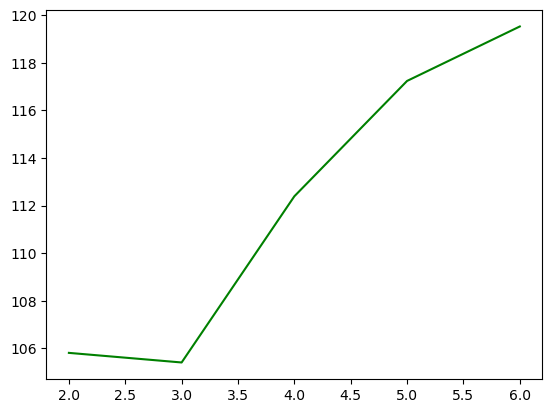

n_components with minimum perplexity: 3


In [254]:
#보다 정확한 결과를 얻기 위해 max_iter를 5가 아닌 7로 진행.
#결과로 최적토픽수가 3이라는 것을 확인했다.

def test_perplexity(cv, start=10, end=30, max_iter=7, topic_word_prior= 0.1, 
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter, 
                                        topic_word_prior= topic_word_prior, 
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs= -1,
                                        random_state=7)    
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(lda.perplexity(cv))
    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:",
      test_perplexity(et_cv, start=2, end=6))

In [255]:
#토픽 수를 3으로 잡고 상위 10개의 단어 추출.
lda = LatentDirichletAllocation(n_components=3, n_jobs=-1, random_state=0)
et_topics = lda.fit_transform(et_cv)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda,vec.get_feature_names_out(), 10)

#결과는 아래와 같으며 topic0은 도서관 이용과 관련된 내용의 글, topic1은 도서관 내의 창의토론실 등 시설, 열람실 자리, 공부하는 학생의 수를 묻는 상황파악 관련 글
#topic2는 학교 축제와 관련하여 도서관 부스, 도서관에서 진행하는 타동아리의 부스 관련 글로 유추되었다. 

Topic #0: 이용, 열람, 로그인, 공부, 대출, 사진, 신청, 인강, 방법, 홈페이지
Topic #1: 시간, 부스, 축제, 창의, 자리, 번호, 판매, 토론, 버스킹, 운영
Topic #2: 부스, 동아리, 축제, 참여, 여러분, 위치, 준비, 사람, 운영, 화장실


In [256]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
et_topics.shape

(379, 3)

In [257]:
#토픽트렌드 데이터 생성 과정, 문서별 토픽 분포를 나타낸다.
trend_data = pd.DataFrame(et_topics, columns=['Topic' + str(i) for i in range(1, 4)])
trend_data

,Topic1,Topic2,Topic3
0,0.042233,0.650541,0.307226
1,0.037527,0.039572,0.922901
2,0.088799,0.812886,0.098315
3,0.333333,0.333333,0.333333
4,0.048500,0.051381,0.900119
...,...,...,...
374,0.443715,0.443156,0.113128
375,0.166845,0.173926,0.659229
376,0.666156,0.167152,0.166692
377,0.333333,0.333333,0.333333


In [258]:
#데이터 상의 글이 쓰여진 날짜.
df.time

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
374    5.0
375    5.0
376    5.0
377    4.0
378    NaN
Name: time, Length: 379, dtype: float64

In [269]:
#'float' object is not subscriptable 오류로 str()을 넣은 코드로 수정했다.
df.time.map(lambda x: str(x)[:7] if pd.notnull(x) else x)

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
374    5.0
375    5.0
376    5.0
377    4.0
378    NaN
Name: time, Length: 379, dtype: object

In [260]:
trend_data = pd.concat([trend_data, df.time.map(lambda x: str(x)[:7] if pd.notnull(x) else x)], axis=1)
trend_data

,Topic1,Topic2,Topic3,time
0,0.042233,0.650541,0.307226,5.0
1,0.037527,0.039572,0.922901,5.0
2,0.088799,0.812886,0.098315,5.0
3,0.333333,0.333333,0.333333,5.0
4,0.048500,0.051381,0.900119,5.0
...,...,...,...,...
374,0.443715,0.443156,0.113128,5.0
375,0.166845,0.173926,0.659229,5.0
376,0.666156,0.167152,0.166692,5.0
377,0.333333,0.333333,0.333333,4.0


In [261]:
trend_data.iloc[:5, -5:]

,Topic1,Topic2,Topic3,time
0,0.042233,0.650541,0.307226,5.0
1,0.037527,0.039572,0.922901,5.0
2,0.088799,0.812886,0.098315,5.0
3,0.333333,0.333333,0.333333,5.0
4,0.048500,0.051381,0.900119,5.0


In [262]:
#월별 토픽 비중 평균
trend = trend_data.groupby(['time']).mean()
trend

,Topic1,Topic2,Topic3
time,,,
1.0,0.416234,0.202313,0.381453
10.0,0.423616,0.262469,0.313915
11.0,0.396268,0.193012,0.410719
12.0,0.470680,0.268287,0.261032
2.0,0.529771,0.267334,0.202895
3.0,0.391619,0.263898,0.344483
4.0,0.462594,0.305763,0.231643
5.0,0.262810,0.258699,0.478492
6.0,0.528894,0.260277,0.210829


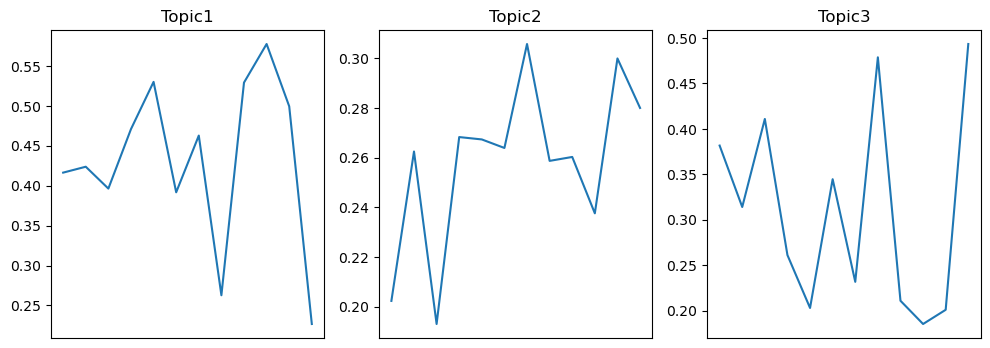

In [268]:
#토픽트렌드 결과 토픽1는 점차 감소하는 cold topic으로 나타났다.
#topic2, topic3은 점차 상승한 토픽으로 hot topic이었다.
#topic1이었던 도서관의 이용법은 학기 중간으로 갈 수록 익숙해져 질문 글이 적어지고
#topic2인 도서관 내 상황 파악은 학기 중간, 시험 기간에 사람이 많은지 파악하는 글이 많이 올라오고
#topic3이었던 부스/활동 등은 학기초보다 중간에 많이 이뤄지기 때문에 점점 글의 빈도가 늘어나는 것으로 논리적으로 타당함을 알 수 있었다. 

fig, axes = plt.subplots(1, 3, sharex='col', figsize=(12, 4)) 
for col, ax in zip(trend.columns.tolist(), axes.ravel()): 
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend[col])
plt.show()